# **Data Exploration Binary Dataset**

* Binary Dataset on Lung Cancer: 
https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer

This is a binary categorical dataset with binary classes. For every feature, except for Gender and Age, there is a binary value, YES or NO

## Necessary Imports

In [2]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
#import tarfile
#import urllib
import pandas as pd
#import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Loading Binary Data

With this code, I load the binary dataset from a folder into a panda datafame 

In [3]:
LUNG_BINARY_PATH = os.path.join("..", "datasets", "1_binary", "unprocessed")

def load_lung_binary(lung_binary_path=LUNG_BINARY_PATH):
    csv_path = os.path.join(lung_binary_path, "1_binary.csv")
    return pd.read_csv(csv_path)

lung_binary = load_lung_binary() 

print("Shape of data: ", lung_binary.shape)
lung_binary.head() #Display first five rows of the frame


Shape of data:  (309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


#### Initial observation: 

There a 16 features in total, one of them is the target class - LUNG_CANCER

Most data, 15 features, is categorical. It is of nominal data type - YES or NO, Male or Female 

Two such featuers are represented using a string ([M,F] for GENDER,[YES,NO] for LUNG_CANCER) 

The other nominal features are have a binary encoding [1,2] for [NO,YES]

There is one attribute, AGE, of type ratio

This dataset has 309 instances

## Initial Analysis of Dataset

In [4]:
lung_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
lung_binary.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

The data has no missing values. Every attribute of the 309 instances has a value.

In [6]:
lung_binary.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


The range of ages is quite wide, from 21 to 87, however, most of the participant ages are around the age of 62, older adults, which is the age of concern for such a disease. Age distribution needs to be checked.

For the other numerical attributues, the mean value hovers around 1.5-1.6, which is a result of the data being a binary encoding of a [YES,NO] classification.

The mean being 1.5, with the standard deviation being around 0.5 indicates that that there is a relatively balanced distribution between the values of non target attributes. This can be further probed.

Features like SMOKING, WHEEZING, and COUGHING have means closer to 1.6, suggesting a slight skew toward 2 ("Yes") responses in these attributes, which could hint that more participants reported these symptoms or risk factors.

In [7]:
lung_binary['LUNG_CANCER'].value_counts()

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

The class distribution for LUNG_CANCER is highly imbalanced, with 270 instances labeled as YES (positive for lung cancer) and only 39 instances labeled as NO (negative for lung cancer). This imbalance may lead to challenges in model training, as most algorithms could be biased towards predicting the majority class. Oversampling may need to be performed to improve model performance.

In [8]:
lung_binary['GENDER'].value_counts()

GENDER
M    162
F    147
Name: count, dtype: int64

The gender spread is quite balanced, indicating the dataset is unbiased in that sense.

## Data Normalization

For further data analysis it will be useful to normalise the data from [1,2] to [0,1], [M,F] to [0,1] and from [NO,YES] to [0,1]. This is important for two reasons: better values for training neural networks and visualising the spread of target attribute.

In [9]:
# Create a copy of the original DataFrame to work with
lung_binary_binary = lung_binary.copy()

# Convert categorical values to binary [0, 1]
# Convert GENDER: M = 0, F = 1
lung_binary_binary['GENDER'] = lung_binary_binary['GENDER'].replace({'M': 0, 'F': 1})

# Convert LUNG_CANCER: NO = 0, YES = 1
lung_binary_binary['LUNG_CANCER'] = lung_binary_binary['LUNG_CANCER'].replace({'NO': 0, 'YES': 1})

# Convert all other features from [1, 2] to [0, 1], NO = 0, YES = 1
for column in lung_binary_binary.columns:
    if lung_binary_binary[column].dtype == 'int64' and lung_binary_binary[column].isin([1, 2]).all():
        lung_binary_binary[column] = lung_binary_binary[column] - 1

# Display the first few rows to verify changes
lung_binary_binary.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


## Further Data Analysis

#### Age Distribution

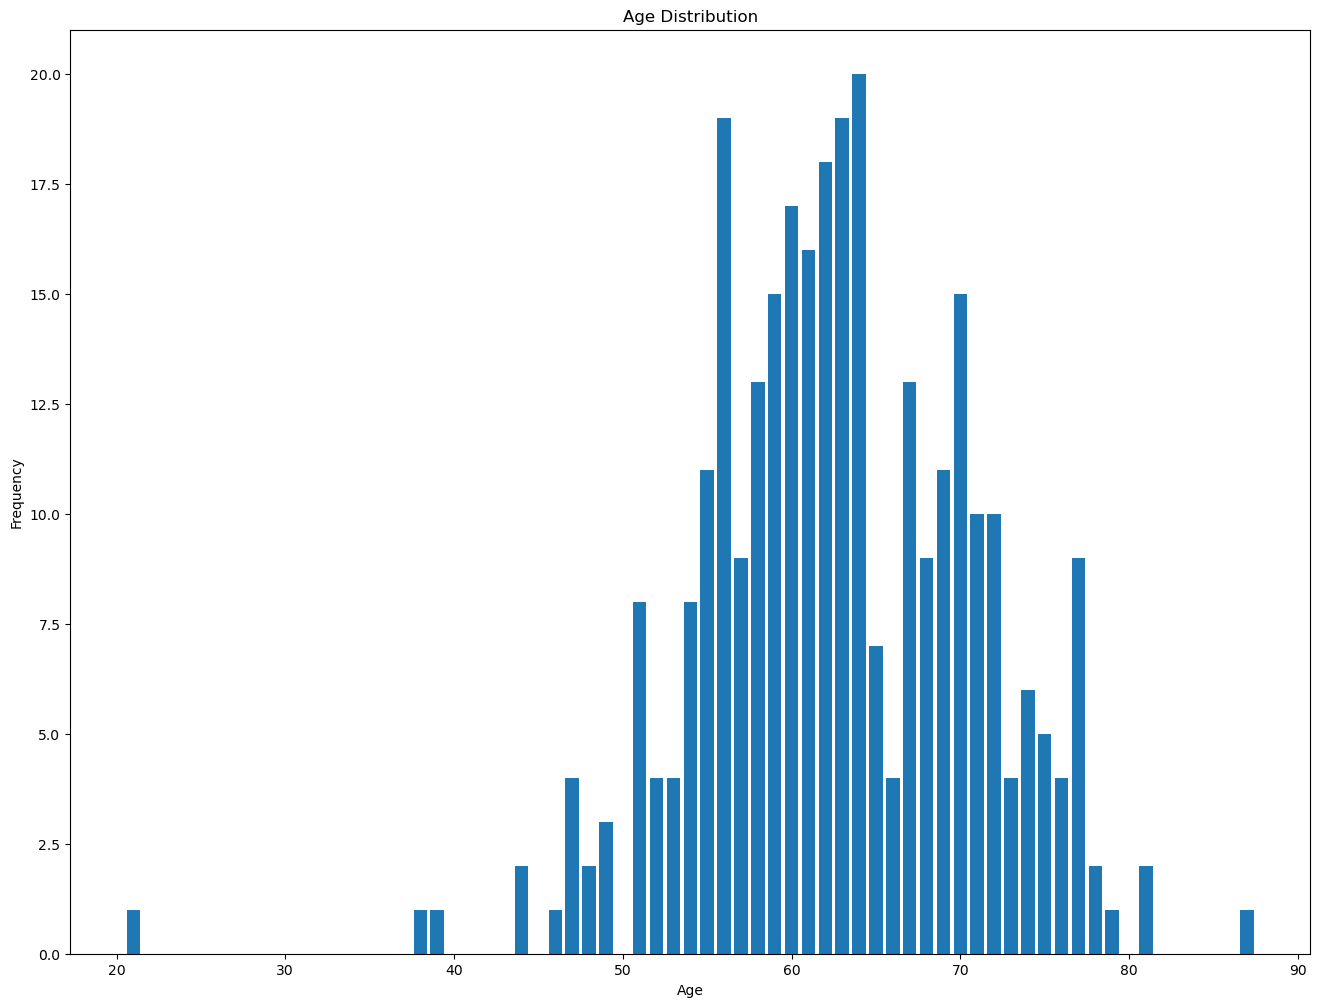

In [11]:
# Count occurrences of each age and sort by age value
age_counts = lung_binary_binary['AGE'].value_counts().sort_index()

# Plot using bar chart for exact frequency of each age
plt.figure(figsize=(16, 12))
plt.bar(age_counts.index, age_counts.values)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

By plotting a histogram of age values, it is clear that most participant ages are betweem 50 and 80, with very few perticipants between ages 40 and 50. 

There is a outlier at the age of 21 and 87. There are no instances at age 50 or 45.

There is a particularly high concentration in the 58-63 age range. Followed by a significant dip in occurances at ages 65-66.

Overall, this somewhat looks like a normal distribution with a mean age around 62.

#### Feature Distributions

Let's plot a histogram for the binary attributes.

array([[<Axes: title={'center': 'GENDER'}>,
        <Axes: title={'center': 'SMOKING'}>,
        <Axes: title={'center': 'YELLOW_FINGERS'}>,
        <Axes: title={'center': 'ANXIETY'}>],
       [<Axes: title={'center': 'PEER_PRESSURE'}>,
        <Axes: title={'center': 'CHRONIC DISEASE'}>,
        <Axes: title={'center': 'FATIGUE'}>,
        <Axes: title={'center': 'ALLERGY'}>],
       [<Axes: title={'center': 'WHEEZING'}>,
        <Axes: title={'center': 'ALCOHOL CONSUMING'}>,
        <Axes: title={'center': 'COUGHING'}>,
        <Axes: title={'center': 'SHORTNESS OF BREATH'}>],
       [<Axes: title={'center': 'SWALLOWING DIFFICULTY'}>,
        <Axes: title={'center': 'CHEST PAIN'}>,
        <Axes: title={'center': 'LUNG_CANCER'}>, <Axes: >]], dtype=object)

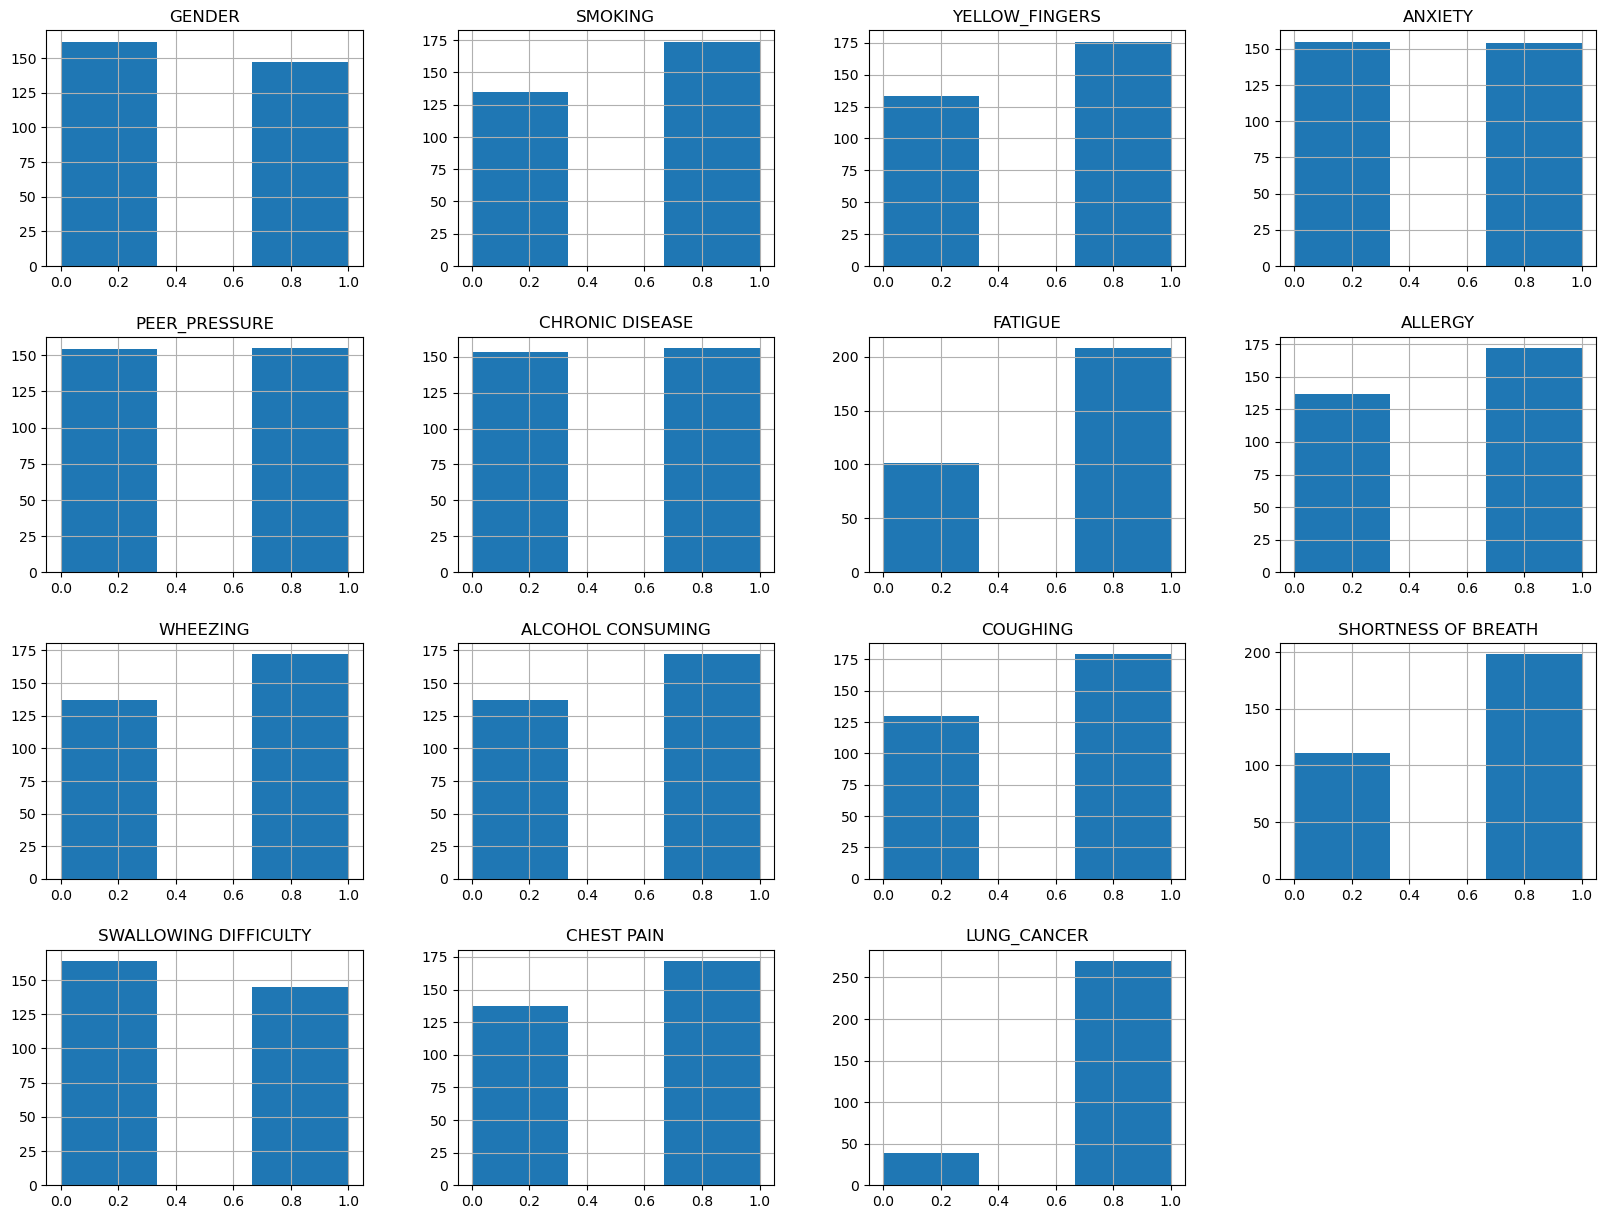

In [ ]:
# Select all columns except 'AGE'
lung_binary_binary_excl_age = lung_binary_binary.drop(columns=['AGE'])

# Plot histograms for all selected columns
lung_binary_binary_excl_age.hist(figsize=(20, 15), bins=3)


Features like GENDER, ANXIETY, PEER_PRESSURE, CHRONIC DISEASE, WHEEZING, and SWALLOWING DIFFICULTY appear to be relatively balanced between the two categories (0 and 1), with counts close to 150 for each category

On the other hand, SMOKING, YELLOW_FINGERS, FATIGUE, ALLERGY, COUGHING, SHORTNESS OF BREATH, ALCOHOL CONSUMING, and CHEST PAIN show a noticeable imbalance, with one category being more prevalent than the other.

The LUNG_CANCER feature is highly imbalanced, with a significant majority labeled as 1 (positive for lung cancer). This confirms the earlier observation of class imbalance, which may need addressing in modeling.

FATIGUE and SHORTNESS OF BREATH have the most noticable imbalance, with the majority of patients in this dataset having these symptoms, possibly making the correlate with having LUNG CANCER.

In [ ]:
# Perform correlation analysis between all features and the target variable 'LUNG_CANCER'
correlation_matrix = lung_binary_binary.corr()
lung_cancer_correlation = correlation_matrix["LUNG_CANCER"].sort_values(ascending=False)

# Display the correlations with the target variable 'LUNG_CANCER'
print("Correlation of each feature with LUNG_CANCER:")
print(lung_cancer_correlation)

Correlation of each feature with LUNG_CANCER:
LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
GENDER                  -0.067254
Name: LUNG_CANCER, dtype: float64


#### Non Correlated Features:

SMOKING (0.05), AGE (0.09) nd GENDER(-0.07) are weakly correlated with LUNG_CANCER, suggesting that they might not be a significant predictor in this dataset.

#### Moderately Correlated Features:

ALLERGY has the highest positive correlation with LUNG_CANCER (0.33), followed by ALCOHOL CONSUMING (0.29), SWALLOWING DIFFICULTY (0.26), WHEEZING (0.25), and COUGHING (0.25), indicating they could be relevant predictors in a model

#### Implications for feature selection

None of the features have a strong correlation to LUNG_CANCER (>0.5). The relatively low correlation values overall suggest that lung cancer may depend on a combination of multiple risk factors rather than individual attributes.

Prioritising features with stronger correlations for model training would likely yield better predictions.

#### Further analysis:

Exploring potential interactions between top features for possible feature engineering could lead to new insgihts


In [ ]:
# Create a list of top 5 most correlated features
top_features = ['ALLERGY', 'ALCOHOL CONSUMING', 'SWALLOWING DIFFICULTY', 'WHEEZING', 'COUGHING']

# Create a new DataFrame to store summed interaction terms
lung_binary_interactions = pd.DataFrame()

# Generate interaction terms by summing each pair of top features
interaction_count = 0
for i in range(len(top_features)):
    for j in range(i + 1, len(top_features)):
        # Sum of each pair of features
        feature1, feature2 = top_features[i], top_features[j]
        interaction_column_name = f"{feature1}_{feature2}"
        lung_binary_interactions[interaction_column_name] = lung_binary_binary[feature1] + lung_binary_binary[feature2]
        interaction_count += 1
        if interaction_count >= 10:
            break
    if interaction_count >= 10:
        break

# Normalize the interaction terms to map values of 0, 1, 2 to 0, 0.5, 1
lung_binary_interactions = lung_binary_interactions / 2

# Add the target variable 'LUNG_CANCER' as the last column
lung_binary_interactions['LUNG_CANCER'] = lung_binary_binary['LUNG_CANCER']

lung_binary_interactions.head()

,ALLERGY_ALCOHOL CONSUMING,ALLERGY_SWALLOWING DIFFICULTY,ALLERGY_WHEEZING,ALLERGY_COUGHING,ALCOHOL CONSUMING_SWALLOWING DIFFICULTY,ALCOHOL CONSUMING_WHEEZING,ALCOHOL CONSUMING_COUGHING,SWALLOWING DIFFICULTY_WHEEZING,SWALLOWING DIFFICULTY_COUGHING,WHEEZING_COUGHING,LUNG_CANCER
0,0.5,0.5,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1
1,0.5,1.0,0.5,0.5,0.5,0.0,0.0,0.5,0.5,0.0,1
2,0.0,0.0,0.5,0.5,0.0,0.5,0.5,0.5,0.5,1.0,0
3,0.5,0.5,0.0,0.0,1.0,0.5,0.5,0.5,0.5,0.0,0
4,0.0,0.0,0.5,0.5,0.0,0.5,0.5,0.5,0.5,1.0,0


#### Feature Extraction Through Combination

In this step, we created a new DataFrame, `lung_binary_interactions`, containing the summed interaction terms for the top 5 most correlated features.

In [ ]:
# Calculate the correlation matrix for the summed interactions with 'LUNG_CANCER'
interaction_correlations = lung_binary_interactions.corr()

# Display the correlation matrix with 'LUNG_CANCER'
interaction_correlations_with_target = interaction_correlations['LUNG_CANCER'].sort_values(ascending=False)

# Print the correlations in a sorted format
print("Correlation of each feature pair (summed) with LUNG_CANCER:")
print(interaction_correlations_with_target)

Correlation of each feature pair (summed) with LUNG_CANCER:
LUNG_CANCER                                1.000000
ALLERGY_SWALLOWING DIFFICULTY              0.428705
SWALLOWING DIFFICULTY_COUGHING             0.391638
ALCOHOL CONSUMING_SWALLOWING DIFFICULTY    0.389447
ALLERGY_WHEEZING                           0.376618
ALLERGY_ALCOHOL CONSUMING                  0.375856
ALLERGY_COUGHING                           0.373818
SWALLOWING DIFFICULTY_WHEEZING             0.348139
ALCOHOL CONSUMING_COUGHING                 0.346386
ALCOHOL CONSUMING_WHEEZING                 0.338044
WHEEZING_COUGHING                          0.300308
Name: LUNG_CANCER, dtype: float64


#### Combined Features Correlation Analysis:

Combining the top 5 most correlated features has resulted in stronger correlations to the target class.

The most correlated pair, ALLERGY_SWALLOWING DIFFICULTY (0.43), is noticably more correlated than the most correlated signle feature, ALLERGY (0.33).

Using combinations of most correlated features could improve model performance.

#### Next: Combinations of Three Features from top 5 most correlated features

In [ ]:
from itertools import combinations

# Create a new DataFrame to store the three-feature interaction terms
lung_binary_interactions_three = pd.DataFrame()

# Generate interaction terms by summing each combination of three features
for combo in combinations(top_features, 3):
    # Sum of the three features in the combination
    feature1, feature2, feature3 = combo
    interaction_column_name = f"{feature1}_{feature2}_{feature3}"
    lung_binary_interactions_three[interaction_column_name] = (
        lung_binary_binary[feature1] + lung_binary_binary[feature2] + lung_binary_binary[feature3]
    )

# Normalize the interaction terms to map values of 0, 1, 2, 3 to 0, 0.33, 0.67, and 1
lung_binary_interactions_three = lung_binary_interactions_three / 3

# Add the target variable 'LUNG_CANCER' as the last column without normalization
lung_binary_interactions_three['LUNG_CANCER'] = lung_binary_binary['LUNG_CANCER']

# Calculate the correlation matrix for the three-feature interactions with 'LUNG_CANCER'
interaction_correlations_three = lung_binary_interactions_three.corr()

# Display the correlation matrix with 'LUNG_CANCER'
interaction_correlations_with_target_three = interaction_correlations_three['LUNG_CANCER'].sort_values(ascending=False)

# Print the correlations in a sorted format
print("Correlation of each three-feature combination (summed) with LUNG_CANCER:")
print(interaction_correlations_with_target_three)

,ALLERGY_ALCOHOL CONSUMING_SWALLOWING DIFFICULTY,ALLERGY_ALCOHOL CONSUMING_WHEEZING,ALLERGY_ALCOHOL CONSUMING_COUGHING,ALLERGY_SWALLOWING DIFFICULTY_WHEEZING,ALLERGY_SWALLOWING DIFFICULTY_COUGHING,ALLERGY_WHEEZING_COUGHING,ALCOHOL CONSUMING_SWALLOWING DIFFICULTY_WHEEZING,ALCOHOL CONSUMING_SWALLOWING DIFFICULTY_COUGHING,ALCOHOL CONSUMING_WHEEZING_COUGHING,SWALLOWING DIFFICULTY_WHEEZING_COUGHING,LUNG_CANCER
0,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1
1,0.666667,0.333333,0.333333,0.666667,0.666667,0.333333,0.333333,0.333333,0.000000,0.333333,1
2,0.000000,0.333333,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.666667,0.666667,0
3,0.666667,0.333333,0.333333,0.333333,0.333333,0.000000,0.666667,0.666667,0.333333,0.333333,0
4,0.000000,0.333333,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.666667,0.666667,0


#### Combinations of Three Features Analyis 

Combining tree features has resulted in even better correlation, with four combinations exceeding the previous benchmark of r=0.43, now being ALLERGY_SWALLOWING DIFFICULTY_COUGHING (0.49)

One observation is that the most correlated combination is not the one of the top 3 standalone most correlated features, revealing interesting feature dependencies which were previosly unaccesable.

Using these engineered features will likely improve model performance, that remains to be tested.

## Consideration of Other Data Analysis Methods

Due to the nature of this dataset (most features being of nominal binary type), certain data exploration methods do not yield useful insights. This section explores them and shows that to be the case

#### Min-Max Scaling

This is self-explanatory, as the data is already binary and can only come in values of [0,1], thus, Min-Max scaling would simply produce the sme frame as lung_binary_binary

#### Z-Score

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance to apply z-score normalization
scaler = StandardScaler()

# Separate the target column 'LUNG_CANCER' from the features
features = lung_binary_binary.drop(columns=['LUNG_CANCER'])
target = lung_binary_binary['LUNG_CANCER']

# Fit the scaler to the features and transform them
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame with scaled features and add the target column back
lung_binary_binary_zscore = pd.DataFrame(scaled_features, columns=features.columns)
lung_binary_binary_zscore['LUNG_CANCER'] = target.reset_index(drop=True)

# Display the first few rows of the standardized DataFrame
lung_binary_binary_zscore.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,-0.952579,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475,1
1,-0.952579,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475,1
2,1.049781,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475,0
3,-0.952579,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475,0
4,1.049781,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480,0


Applying Z-Score normalisation produces discrete values which are harder to interpret than previous [0,1] values. 

Due to the binary nature of this dataset, Z-Score normalisation does not add any meaningful information.

### Scatter-Plots


array([[<Axes: xlabel='ALLERGY', ylabel='ALLERGY'>,
        <Axes: xlabel='ALCOHOL CONSUMING', ylabel='ALLERGY'>,
        <Axes: xlabel='SWALLOWING DIFFICULTY', ylabel='ALLERGY'>,
        <Axes: xlabel='LUNG_CANCER', ylabel='ALLERGY'>],
       [<Axes: xlabel='ALLERGY', ylabel='ALCOHOL CONSUMING'>,
        <Axes: xlabel='ALCOHOL CONSUMING', ylabel='ALCOHOL CONSUMING'>,
        <Axes: xlabel='SWALLOWING DIFFICULTY', ylabel='ALCOHOL CONSUMING'>,
        <Axes: xlabel='LUNG_CANCER', ylabel='ALCOHOL CONSUMING'>],
       [<Axes: xlabel='ALLERGY', ylabel='SWALLOWING DIFFICULTY'>,
        <Axes: xlabel='ALCOHOL CONSUMING', ylabel='SWALLOWING DIFFICULTY'>,
        <Axes: xlabel='SWALLOWING DIFFICULTY', ylabel='SWALLOWING DIFFICULTY'>,
        <Axes: xlabel='LUNG_CANCER', ylabel='SWALLOWING DIFFICULTY'>],
       [<Axes: xlabel='ALLERGY', ylabel='LUNG_CANCER'>,
        <Axes: xlabel='ALCOHOL CONSUMING', ylabel='LUNG_CANCER'>,
        <Axes: xlabel='SWALLOWING DIFFICULTY', ylabel='LUNG_CANCER'>,
 

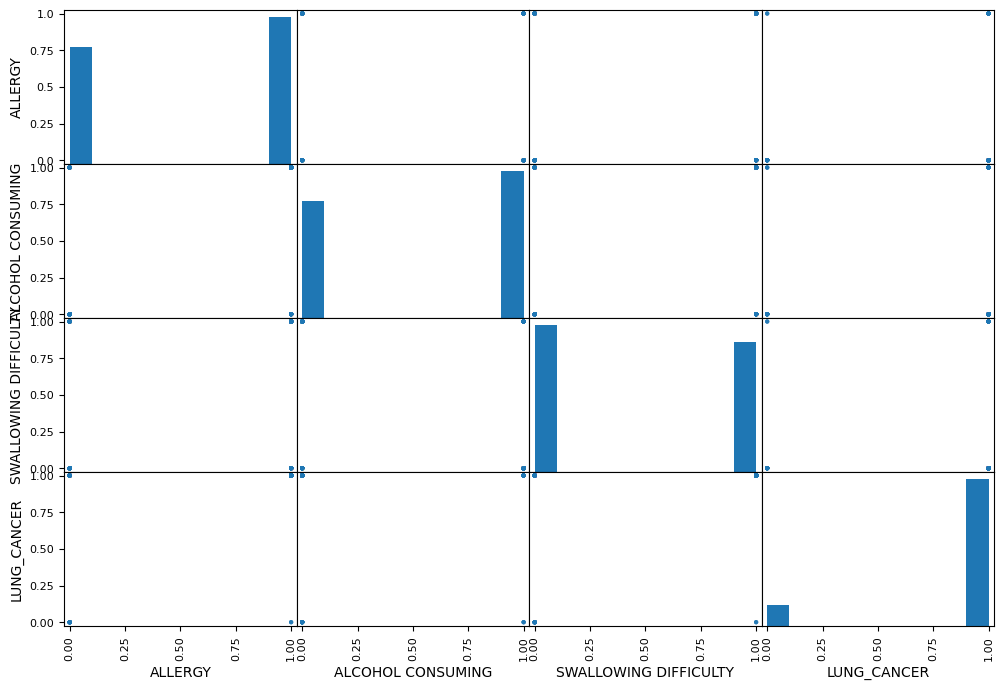

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['ALLERGY', 'ALCOHOL CONSUMING', 'SWALLOWING DIFFICULTY', 'LUNG_CANCER']
scatter_matrix(lung_binary_binary[attributes], figsize=(12,8))

Due to the binary nature of this dataset, plotting features against each other results in dots in the four corners. Such a plot does not reveal any useful information.

However, this dataset does contain one continuous feature,AGE, which is worth investigating

<Axes: xlabel='AGE', ylabel='ALLERGY'>

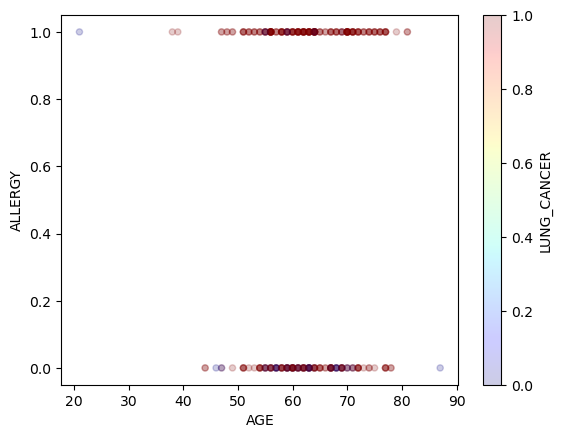

In [ ]:
lung_binary_binary.plot(kind="scatter", x="AGE", y="ALLERGY", alpha=0.2, c="LUNG_CANCER", cmap=plt.get_cmap("jet"), colorbar=True)

Even using tools that often reveal important information (ocloring a third attribute), does not provide any useful insight in this case.

Because there is only one continuos fature in this dataset, it has to be plotted against a bianry value, which results in two lines, one at the top and one at the bottom.
It is hard to tell any correlation from this, especailly since attributes in this dataset are moderately correlated at most.

Using color to indicate LUNG_CANCER is useless because the instances overlap and blend together.

#### Other Attribute Combinations

No meaningful features can be derived by multiplying, subtracting or dividing calues of the features.